# Neccesary Libraries

Numpy stands for numerical python and is a library used for basic array operations and arithematic

Pandas is used for dataframe operations. 

Matplotlib is a visualization library

Seaborn is an aiding library to matplotlib for visualization, it makes the visualizations more interactive and appealing

Sklearn is a modelling package


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

## Dataset

We used a publically available dataset from kaggle that ha horizontal photovoltaic power output data from 12 sites in the northern hemisphere over a time period of 14 months. 

Independent variables in each column include: 
1. location
Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului','Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis',
       'USAFA
2. Date:
Ranging from 3rd September'2017 to 16th December'2018 expressed in YYYYMMDD format
3. time 
Timestamp of time of observation
4. latitude 
47.11, 40.67, 41.15, 26.98, 20.89, 47.52, 33.9 , 44.89, 41.13, 38.82, 38.16, 38.95
5. longitude 
-122.57,  -86.15, -111.99,  -80.11, -156.44, -111.18, -117.26,-93.2 ,  -95.75, -104.71, -121.56, -104.83. ...12 values for 12 locations <br>
6. altitude <br>
7. YRMODAHRMI (year and month)<br>
8. month<br>
9. hour<br>
10. season<br>
('Winter', 'Spring', 'Summer', 'Fall')<br>
11. humidity<br>
12. ambient temperature<br>
13. wind speed<br>
14. visibility<br>
15. pressure<br>
16. cloud ceiling<br>

# PART 1

In [2]:
df = pd.read_csv('Pasion et al dataset.csv') #importing data set using pandas

# Exploratory Data Analysis

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [4]:
df.head() #analysing the first 5 columns

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [5]:
df.Location.unique()

array(['Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului',
       'Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis',
       'USAFA'], dtype=object)

In [6]:
df.describe() #basic analysis of all columns

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


## Histogram of Target Variable

We Plot the histogram of target variable (polypwr) using matplotlib and seaborn to see what values does it take the most. We see that polypwr take values between 0-5W most frequently. 
The distribution is is fairly regular with 2 peaks and the values beyond 30W are rarely seen. 

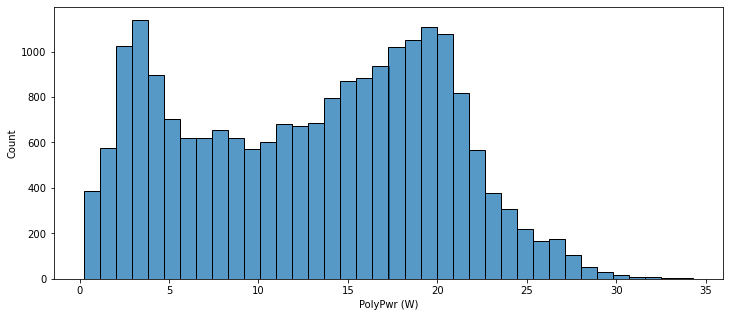

In [7]:
plt.figure(figsize=(12,5))
sns.histplot(df.PolyPwr);
plt.xlabel('PolyPwr (W)');

## Scattter Plots

### Variation of Target variable w.r.t Humidity

We see that humidity and target variable seem to have a slight negative correlation

<AxesSubplot:xlabel='PolyPwr', ylabel='Humidity'>

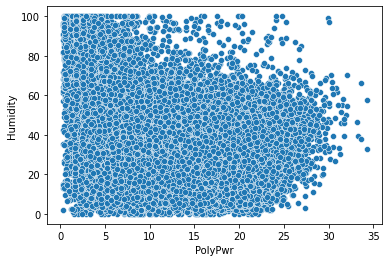

In [8]:
sns.scatterplot(x='PolyPwr',y='Humidity', data=df)

### Variation of Target variable w.r.t Temperature

We observe a slight positive correlation between the target variable and temperature

<AxesSubplot:xlabel='PolyPwr', ylabel='AmbientTemp'>

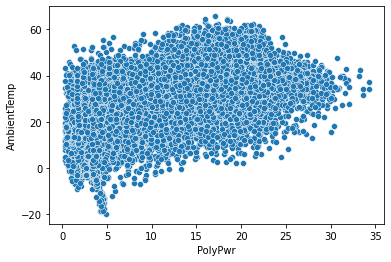

In [9]:
sns.scatterplot(x='PolyPwr',y='AmbientTemp', data=df)

## Correlation Plot


Ambient temperature, cloud ceiling, and humidity are the top three most correlated features with solar power output. Non correlated columns are dropped. 

In [10]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()

In [11]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

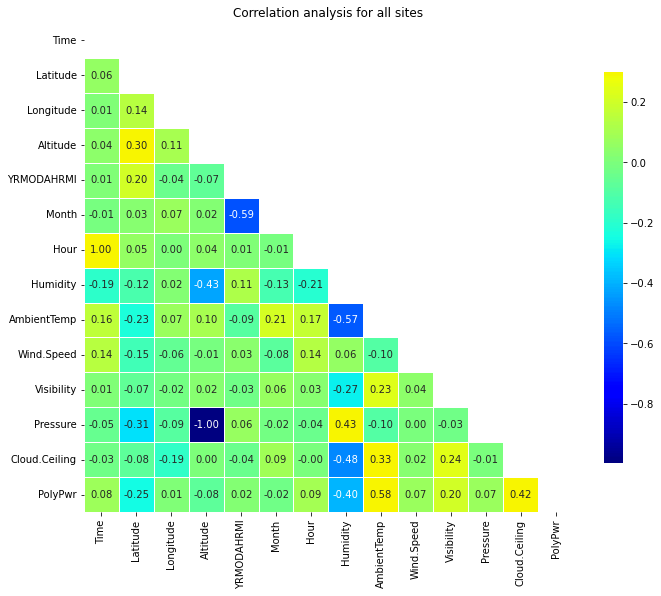

In [12]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});

plt.title('Correlation analysis for all sites');

# PART 2

## Feature Encoding & Engineering

### Categorical Variables

Categorical variables like location and season can't be input into the model directly. We use get_dummies function of Pandas library to encode location & season. 

get_dummies creates number of colums as there are categories in a categorical variable column and represents the value for a row as 1 and the rest as 0. 

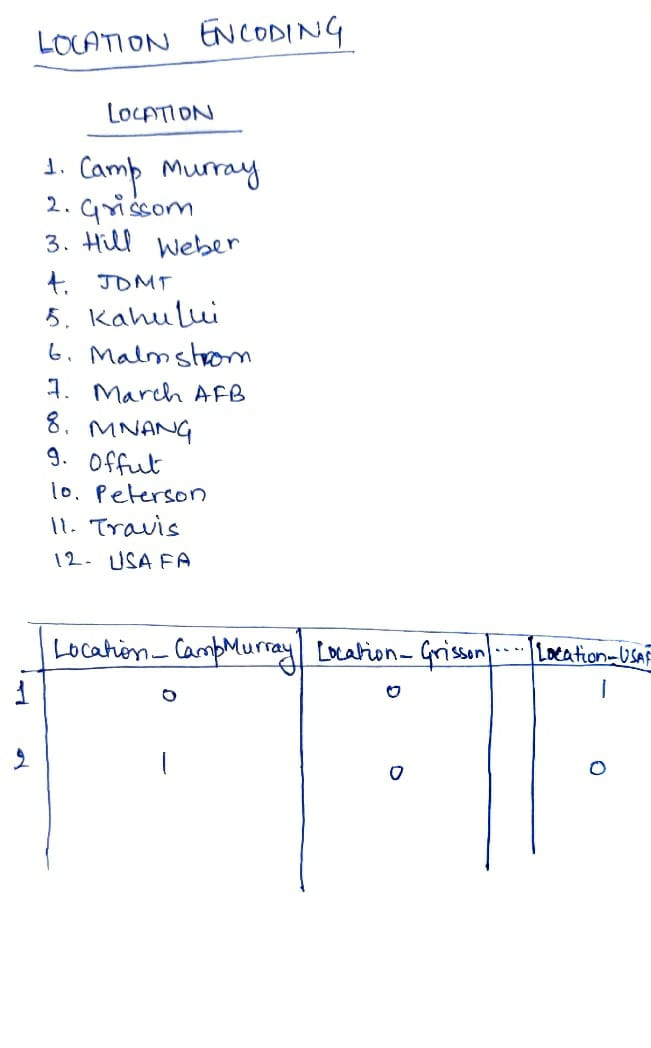

In [13]:
# Encode location data
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [14]:
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

In [15]:
df_with_loc_season_en.info() #encoded dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21045 non-null  int64  
 1   Time                 21045 non-null  int64  
 2   Latitude             21045 non-null  float64
 3   Longitude            21045 non-null  float64
 4   Altitude             21045 non-null  int64  
 5   YRMODAHRMI           21045 non-null  float64
 6   Month                21045 non-null  int64  
 7   Hour                 21045 non-null  int64  
 8   Humidity             21045 non-null  float64
 9   AmbientTemp          21045 non-null  float64
 10  PolyPwr              21045 non-null  float64
 11  Wind.Speed           21045 non-null  int64  
 12  Visibility           21045 non-null  float64
 13  Pressure             21045 non-null  float64
 14  Cloud.Ceiling        21045 non-null  int64  
 15  Location_Grissom     21045 non-null 

### Time-series data

Time series data can't be input into the model directly, it's only significance is to show ascending order of data however, colums like hours, date, months, years show cyclicity. Ex. reading at 3PM today is likely to be similar to reading at 3PM tommorow. 

Hence we can engineer these colums as interpretable features in the model to include the aspect of cyclicity.


Sine and cosine functions are cyclic so we convert the time elapsed since minimum hour of interest using sine and cosine functions

In [16]:
min_hour_of_interest = 10
max_hour_of_interest = 15

#out of all the data collected, we are interested in only 10AM to 3PM (represented by 15)

In [17]:
df_with_loc_season_en['delta_hr']= df_with_loc_season_en.Hour - min_hour_of_interest 

# We found the number of hours elapsed since our minimum hour of interest. Ex. if it's 4PM =16 and our minimum hour of interest is 10. 6 hours have elapsed. delta_hr = 6

In [18]:
# Create Cyclic features

df_with_loc_season_en['sine_mon']= np.sin((df_with_loc_season_en.Month - 1)*np.pi/11) #sin of month(0-11)/11 [the -1 is because we needed jan to start from 0 not 1]
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)


df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
#sin of (delta_hr divided by number of hours (15-10))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

### Correlation Plot after feature engineering

In [19]:
mask2 = np.triu(np.ones_like(df_with_loc_season_en.corr(), dtype=bool))

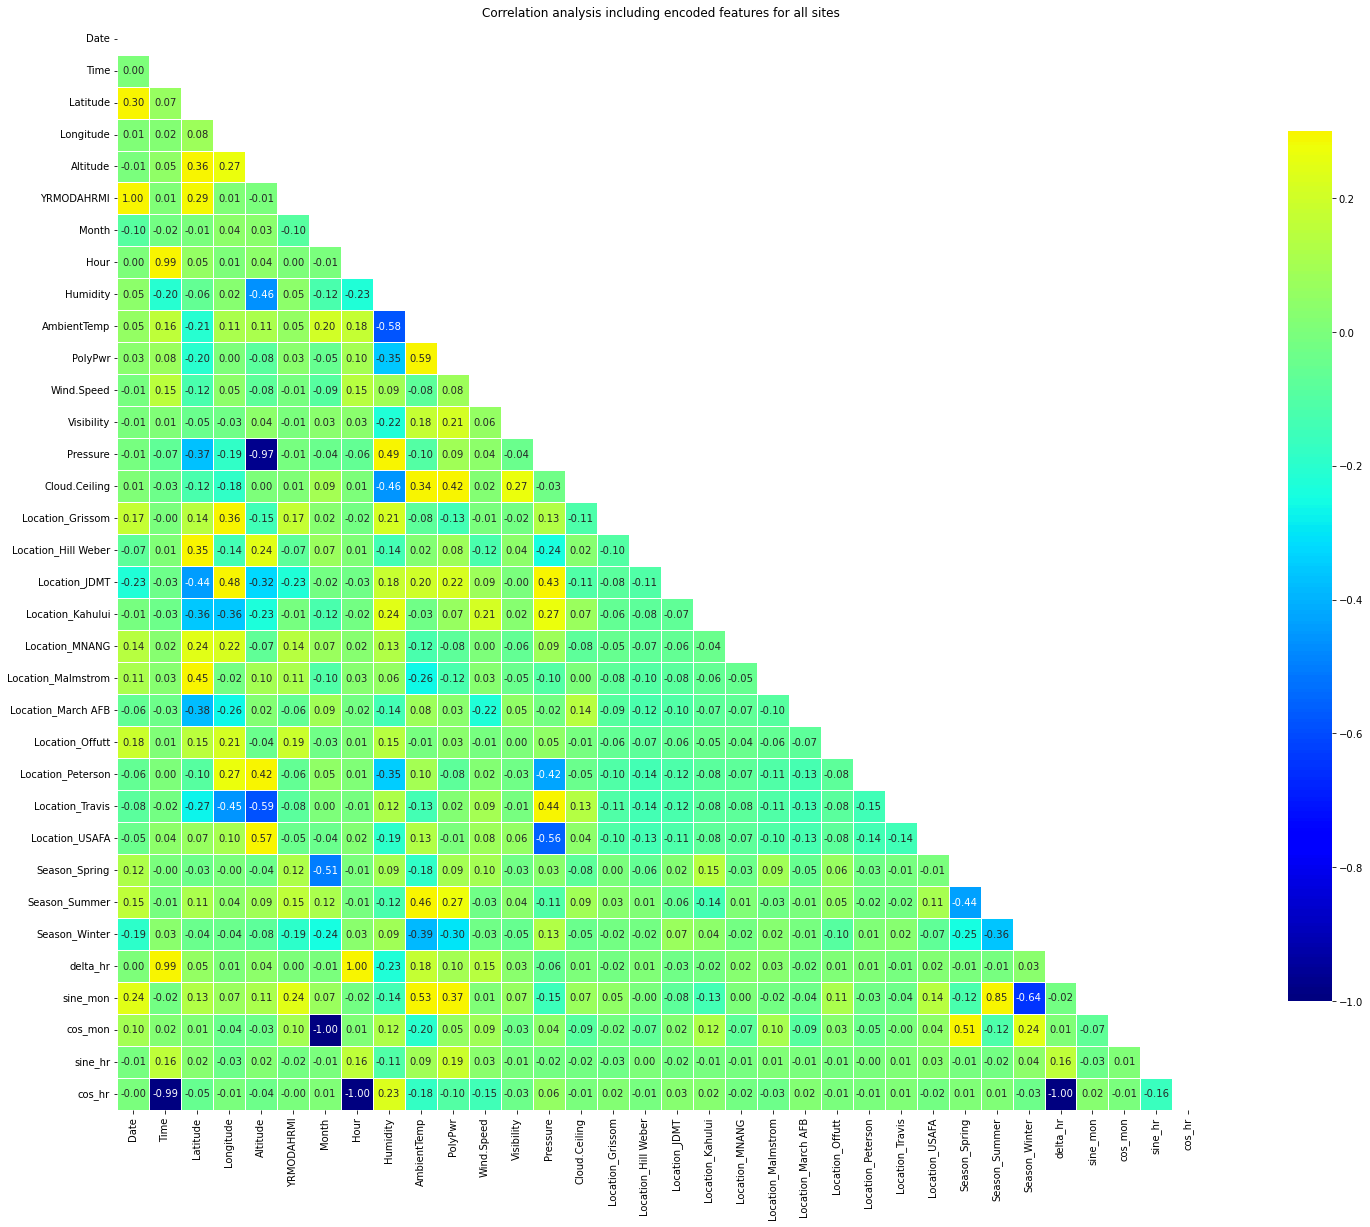

In [20]:
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df_with_loc_season_en.corr(method='spearman'), mask=mask2, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis including encoded features for all sites');

Selecting columns based on correlation plot 

In [21]:
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 'Location_Grissom',
                     'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
                     'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
                     'Location_Offutt', 'Location_Peterson', 'Location_Travis',
                     'Location_USAFA','Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

# PART 3

## Splitting Data


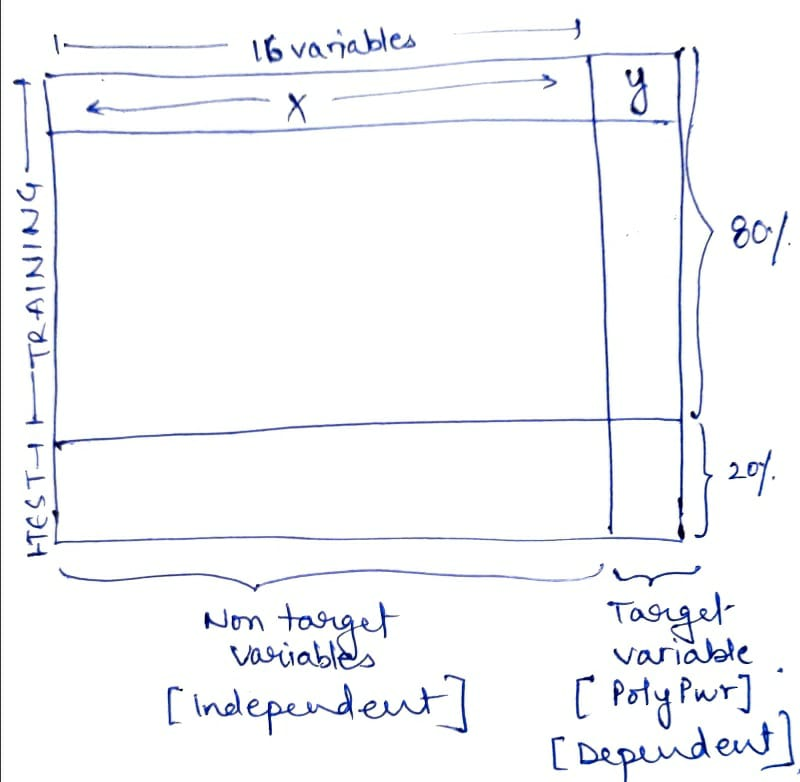

In [22]:
#creating a new dataframe with selected columns and resetting the index of columns 
df_processed = df_with_loc_season_en[selected_columns].reset_index(drop=True) 

In [23]:
target_label = 'PolyPwr'

In [24]:
input_feat = list(set(selected_columns).difference(set([target_label]))) #all columns except the target variable

In [25]:
#dataframe of non-target variables
df_X = df_processed[input_feat].reset_index(drop=True) 

In [26]:
#dataframe of target variable 
df_y = df_processed[target_label] 

In [27]:
# Splitting the dataset into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=1) 

#random state defines how rows are picked for the training-test split

# Training the model

Input -> scale -> model -> predict

## Scaling Data

The values of features are far apart due to units. For ex. in our dataset humidity ranges from 0-100 but temperature ranges from -20 to 66. These need to be scaled in order for the model to fit properly. 

We used the StandardScaler method that uses Z-score to scale according to variance

z = (x - u) / s

where u is the mean of the training samples or zero and s is the standard deviation of the training samples or one

In [28]:
estimators = [] #array of what we are feeding into scaling
estimators.append(('standardize', StandardScaler()))#pipelinefunction2

estimators.append(('knn', KNeighborsRegressor()))#pipelinefunction3
knn_pipeline = Pipeline(estimators)

#KNeighborRegressor plots all the training points. When it gets a test point, it plots it based on non-target columns. Based on n_neighbors_list it picks k points that are closest and then averages it to give the value of the target variable. 

## Hyperparameter Tuning

In [29]:
# Creating a list of each hyperparameter to tune with the values it can take 

n_neighbors_list = [int(x) for x in range (3, 18)] #number of neighnours chosen in KNN

weights_list = ['uniform', 'distance'] 

algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']

leaf_size_list = [20, 30, 40, 50, 60, 70] #how it will decide the order of points to calc dist

p_list = [2, 3, 4, 5, 6] 

In [30]:
# Structuring it into a dictionary
knn_grid = {'knn__n_neighbors':n_neighbors_list,
             'knn__weights':weights_list,
             'knn__algorithm':algorithm_list,
             'knn__leaf_size':leaf_size_list,
             'knn__p':p_list}

GridSearchCV and RandomSearchCV

Grid search will take all the defined values of the selected hyperparamenters and run them in combinations to see which parameter combinations deliver the best results


Random Search will take all the values in the range of values we defined of the selected hyperparamenters and run them in combinations to see which parameter combinations deliver the best results. 

We chose random search since it delivers better values of the hyperparameters

In [31]:
#taking different values of hyperparameters
knn_random = RandomizedSearchCV(estimator=knn_pipeline, param_distributions=knn_grid, 
                                 n_iter=10, cv=4, verbose=2, random_state=42, 
                                 n_jobs=-1)
#n_iter is number of combinations it will run
#cv or cross validation implies 4 splits. 

In [32]:
%%time
# testing combination on model


knn_random.fit(X_train, y_train) #pipelinfunction1

Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: total: 312 ms
Wall time: 2min 18s


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                             ('knn', KNeighborsRegressor())]),
                   n_jobs=-1,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__leaf_size': [20, 30, 40, 50, 60,
                                                           70],
                                        'knn__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14, 15, 16, 17],
                                        'knn__p': [2, 3, 4, 5, 6],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, verb

In [33]:
# Geting optimal hyperparams
knn_random.best_params_

{'knn__weights': 'uniform',
 'knn__p': 2,
 'knn__n_neighbors': 14,
 'knn__leaf_size': 70,
 'knn__algorithm': 'auto'}

In [34]:
# Getting score of best model during hyperparameter tuning
knn_random.best_score_

0.6171844153039511

In [35]:
mean_score = knn_random.cv_results_['mean_test_score']
std_score = knn_random.cv_results_['std_test_score']
params = knn_random.cv_results_['params']

In [36]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

# PART 4

## Model Fitting
here we are training the model using the optimal hyperparameters that we found above

In [37]:
knn_model = knn_pipeline.set_params(**knn_random.best_params_)

In [38]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('knn', KNeighborsRegressor(leaf_size=70, n_neighbors=14))])

In [39]:
knn_model.score(X_test,y_test)

0.6286690083342694

# Predictions Based on the Model
making predictions based on the learning from the trained model on the test data set

In [40]:
y_pred = knn_model.predict(X_test)

# PERFROMANCE METRICS
We are using performance metrics to evaluate the model performance on the test set

Explained variance and R2 score are similar metrics they have a value between 0 to 1 and the closer the score is to 1 the more accurate the model is

In [41]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

0.6300806671330796

In [42]:
# R2 score
r2_score(y_test.ravel(), y_pred)

0.6286690083342694

RMSE and MAE values have the same unit as the power output(W) .

The RMSE value gives us the absolute measure of the fit.

the MAE gives the mean of absolute errors.

In [43]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

3.0008497186301466

In [44]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

4.382264944722596

In [45]:
mean_absolute_percentage_error(y_test.ravel(), y_pred)*100

55.739572942093815